In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
Xarr = X.to_numpy()

In [8]:
yarr = y.to_numpy()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Xarr)

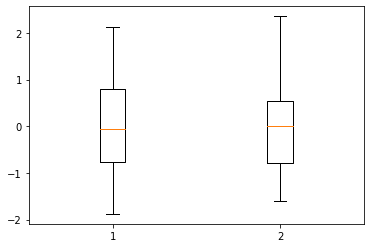

In [10]:
plt.boxplot(X)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yarr, test_size = 0.2)
X.shape, X_train.shape, X_test.shape

((400, 2), (320, 2), (80, 2))

In [13]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
from sklearn.metrics import confusion_matrix
compare = confusion_matrix(y_test, y_pred)
compare

array([[54,  2],
       [10, 14]])

In [21]:
accuracy = (compare[0][0] + compare[1][1])/compare.sum()
accuracy

0.85

In [16]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred)
test_acc

0.85

In [17]:
print(classifier.predict([[1, -1.5]]))

[0]


In [18]:
print(classifier.predict([[1, 0]]))

[1]


# Next: Plot a scatter plot with the decision boundary and the parallels

In [19]:
def plot_support_vector_machine(svm):
    plt.scatter(X[:, 0], X[:, 1], c = yarr, zorder = 10, cmap = plt.cm.Paired, edgecolor = 'k', s = 20)

    plt.scatter(X_test[:, 0], X_test[:, 1], s = 100, facecolors = 'none', zorder = 10, edgecolor = 'k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap = plt.cm.Paired, shading = 'auto')
    plt.contour(XX, YY, Z, colors = ['k', 'k', 'k'], linestyles = ['--', '-', '--'], levels = [-.5, 0, .5])

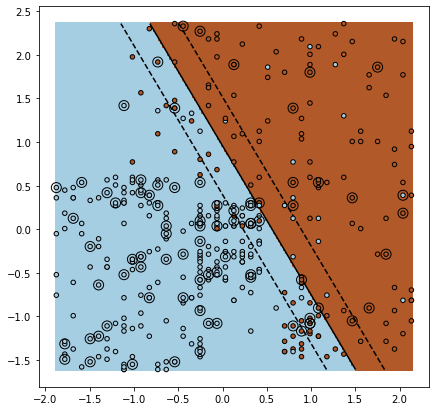

In [20]:
plt.figure(figsize = (7, 7))
plot_support_vector_machine(classifier)

# Poly SVM and RBF

In [22]:
poly_svc = SVC(kernel = 'poly')
poly_svc.fit(X_train, y_train)

y_pred = poly_svc.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

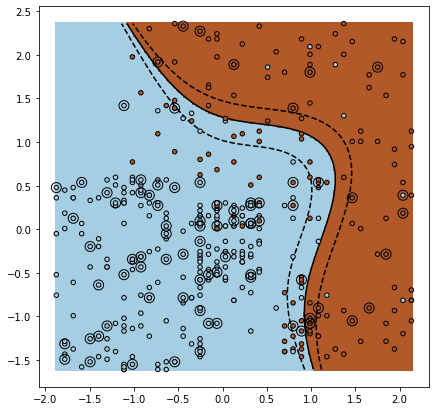

In [23]:
plt.figure(figsize = (7, 7))
plot_support_vector_machine(poly_svc)

In [24]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred)
test_acc

0.8875

In [26]:
rbf_svc = SVC(kernel = 'rbf', gamma = 100, C = 1)
rbf_svc.fit(X_train, y_train)

y_pred = rbf_svc.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

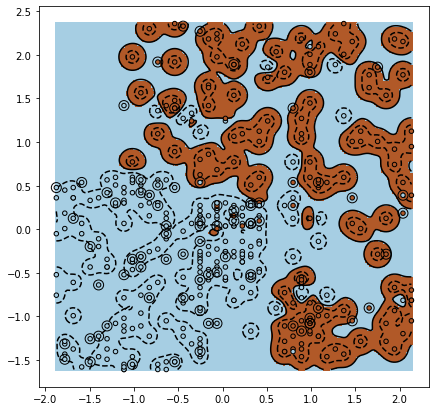

In [27]:
plt.figure(figsize = (7, 7))
plot_support_vector_machine(rbf_svc)

In [28]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred)
test_acc

0.8625

# Parameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = [
    {"kernel": ["linear"], "C": [0.1, 0.5, 1, 5, 10, 30]},
    {"kernel": ["poly"], "C": [0.1, 0.5, 1, 5, 10, 30]},
    {"kernel": ["rbf"], "C": [0.1, 0.5, 1, 5, 10, 30],
        "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0],}
]

In [31]:
grid_cv = GridSearchCV(classifier, params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10, 30], 'kernel': ['linear']},
                         {'C': [0.1, 0.5, 1, 5, 10, 30], 'kernel': ['poly']},
                         {'C': [0.1, 0.5, 1, 5, 10, 30],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0],
                          'kernel': ['rbf']}])

In [32]:
print(f"Highest score of parameter search is: {grid_cv.best_score_:.4f}")

Highest score of parameter search is: 0.9187


In [33]:
print("The parameter of the highest score is as follows")
for key, value in grid_cv.best_params_.items():
    print(f"{key}: {value}")

The parameter of the highest score is as follows
C: 5
gamma: 3.0
kernel: rbf


In [34]:
best_test_acc = accuracy_score(y_test, y_pred)

In [35]:
print(f"Highest parameter test accuracy is {best_test_acc:.3f}")

Highest parameter test accuracy is 0.863
